# Lifespan

Given the file `Macintosh_timeline.csv` which lists the Macintosh releases and decommisions, find the average lifespan of a Mac in days. Round to the nearest whole number.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

mac_timeline_data = pd.read_csv("Macintosh_timeline.csv")

In [2]:
mac_timeline_data.head()

,Year,Launched,Model,Family,Discontinued
0,1984,24-Jan,Macintosh 128K,Compact,9/10/1984
1,1984,10-Sep,Macintosh 512K,Compact,4/14/1986
2,1984,10-Sep,Macintosh 128K (revised),Compact,10/1/1985
3,1985,1-Jan,Macintosh XL,Compact,4/1/1985
4,1986,16-Jan,Macintosh Plus,Compact,1/1/1987


In [3]:
families = mac_timeline_data['Family']
families.value_counts()

MacBook               28
Power Macintosh       27
iMac                  19
PowerBook             16
Compact               14
Workgroup Server      10
Quadra                 9
LC                     8
Xserve                 8
Mac II                 8
Mac mini               7
PowerBook Duo          7
MacBook Pro            6
Mac Pro                6
Performa               5
iBook                  5
Macintosh Server       5
PowerBook G3           4
PowerBook G4           4
PowerBook 500          3
Network Server         3
MacBook Air            2
Centris                2
Portable               2
Mac Mini               2
eMac                   1
MacBook (Mid 2007)     1
Centris / Quadra       1
Macbook                1
Name: Family, dtype: int64

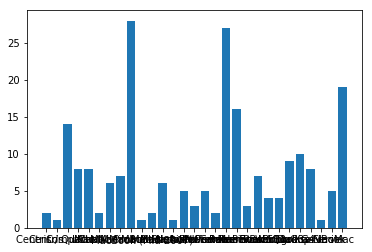

In [4]:
plt.bar(families.value_counts().index, families.value_counts().values)
plt.show()

In [5]:
import datetime as dt

def combine_date(day_month, year):
    month_conv = {
        "Jan": 1,
        "Feb": 2,
        "Mar": 3,
        "Apr": 4,
        "May": 5,
        "Jun": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Nov": 11,
        "Dec": 12
    }
    day, month = day_month.split("-")
    day = int(day)
    month = month_conv[month]
    return dt.date(year, month, day)

In [6]:
date_launched = mac_timeline_data[['Launched', 'Year']].apply(lambda x: combine_date(*x), axis=1)
date_launched.head()

0    1984-01-24
1    1984-09-10
2    1984-09-10
3    1985-01-01
4    1986-01-16
dtype: object

In [7]:
mac_timeline_data['Discontinued'].head()

0    9/10/1984
1    4/14/1986
2    10/1/1985
3     4/1/1985
4     1/1/1987
Name: Discontinued, dtype: object

In [8]:
import time

def convert_to_datetime(d_str):
    if d_str == 'current':
        return None
    
    t_struct = time.strptime(d_str, "%m/%d/%Y")
    t_struct_str = time.mktime(t_struct)
    return dt.date.fromtimestamp(t_struct_str)
    
date_discontinued = mac_timeline_data['Discontinued'].apply(convert_to_datetime)
date_discontinued.head()

0    1984-09-10
1    1986-04-14
2    1985-10-01
3    1985-04-01
4    1987-01-01
Name: Discontinued, dtype: object

In [9]:
date_discontinued.tail()

209          None
210    2013-10-22
211          None
212          None
213          None
Name: Discontinued, dtype: object

In [11]:
mac_timeline_data['delta'] = date_discontinued - date_launched
mac_timeline_data['delta'].head()

0   230 days
1   581 days
2   386 days
3    90 days
4   350 days
Name: delta, dtype: timedelta64[ns]

In [12]:
mac_timeline_data['delta'].tail()

209        NaT
210   251 days
211        NaT
212        NaT
213        NaT
Name: delta, dtype: timedelta64[ns]

In [24]:
filtered_deltas = [t.days for t in mac_timeline_data['delta'] if t is not pd.NaT]
avg_lifespan = sum(filtered_deltas) / len(filtered_deltas)
avg_lifespan

462.79227053140096